<a href="https://colab.research.google.com/github/szymonbiczyk/Cat-Dog-Recognition/blob/main/Cat_Dog_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/dogs_vs_cats/


test  train  validation


In [ ]:
import os, shutil, pathlib


from tensorflow.keras.utils import image_dataset_from_directory

base_dir=pathlib.Path("drive/MyDrive/dogs_vs_cats")

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 1952 files belonging to 2 classes.
Found 998 files belonging to 2 classes.
Found 1021 files belonging to 2 classes.


In [ ]:
#Displaying the shapes of the data and labels yielded by the Dataset


for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape) 
    print("labels batch shape:", labels_batch.shape)
    break


data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
# good practice to do with data
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# data standarization from rgb[0,255] to [0, 1]
normalization_layer = layers.Rescaling(1. /255)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
#num_classes = len(class_names)
from tensorflow.keras import regularizers

model = Sequential([
  
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(180, 180, 3)), # data standarization
    layers.Conv2D(32, (3,3), padding='same',kernel_initializer='he_uniform', activation='relu', input_shape=(180, 180, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3,3), padding='same',kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3,3), padding='same',kernel_initializer='he_uniform', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 90, 90, 32)       

In [ ]:
# fit model
epochs=15
history = model.fit(
    train_dataset,
    validation_data= validation_dataset,
    epochs=epochs
)

Epoch 1/15
61/61 [==============================] - 192s 3s/step - loss: 0.8256 - accuracy: 0.6071 - val_loss: 2.1656 - val_accuracy: 0.5190
Epoch 2/15
61/61 [==============================] - 190s 3s/step - loss: 0.6966 - accuracy: 0.6219 - val_loss: 2.8486 - val_accuracy: 0.5040
Epoch 3/15
61/61 [==============================] - 190s 3s/step - loss: 0.6671 - accuracy: 0.6532 - val_loss: 3.2431 - val_accuracy: 0.5140
Epoch 4/15
61/61 [==============================] - 189s 3s/step - loss: 0.6490 - accuracy: 0.6609 - val_loss: 6.2641 - val_accuracy: 0.5140
Epoch 5/15
61/61 [==============================] - 190s 3s/step - loss: 0.5923 - accuracy: 0.6962 - val_loss: 2.0333 - val_accuracy: 0.5591
Epoch 6/15
61/61 [==============================] - 190s 3s/step - loss: 0.5676 - accuracy: 0.7172 - val_loss: 2.4257 - val_accuracy: 0.5391
Epoch 7/15
61/61 [==============================] - 189s 3s/step - loss: 0.5289 - accuracy: 0.7362 - val_loss: 1.0445 - val_accuracy: 0.6673
Epoch 8/15
61

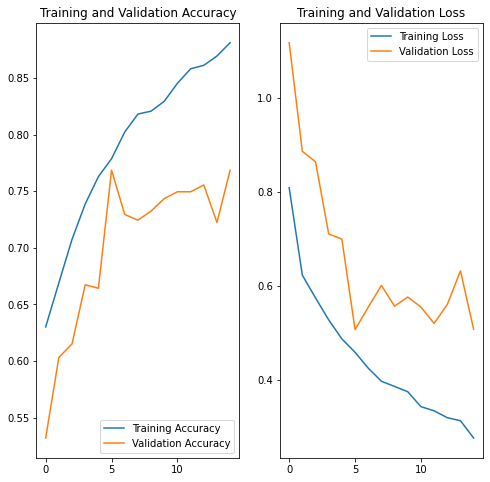

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# evaluate model
_, acc = model.evaluate_generator(test_dataset, steps=len(test_dataset), verbose=0)
print('> %.3f' % (acc * 100.0))

<ipython-input-10-40dc9ae9fa2e>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_dataset, steps=len(test_dataset), verbose=0)


> 76.298
